<a href="https://colab.research.google.com/github/parisazeynaly/Space-X-Dataset/blob/main/Space_x_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import missingno as msno


# **EDA**

In [67]:
df=pd.read_csv('dataset_falcon9.csv')
# Basic structure
print("Shape of dataset:", df.shape)
print("\nInfo:\n")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary stats:\n", df.describe(include='all'))

Shape of dataset: (90, 18)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Cl

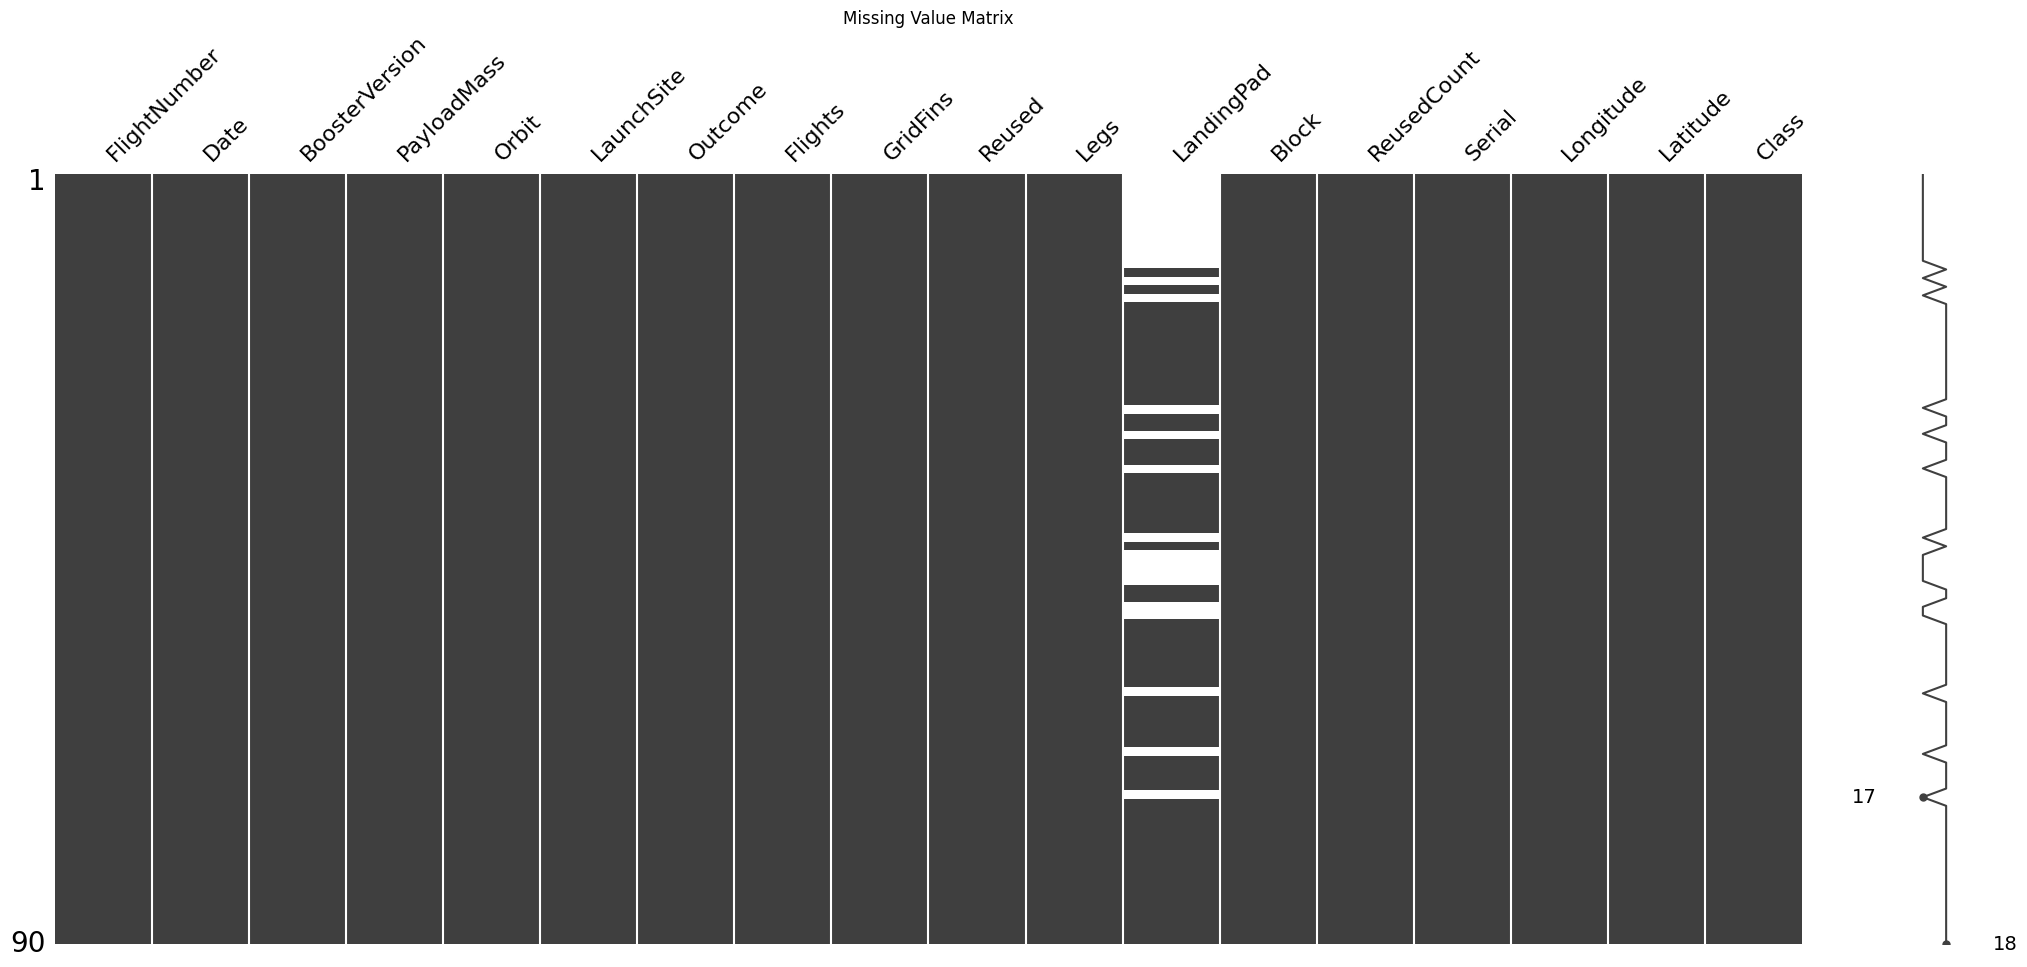

In [68]:
# Visualize missing data
msno.matrix(df)
plt.title("Missing Value Matrix")
plt.show()


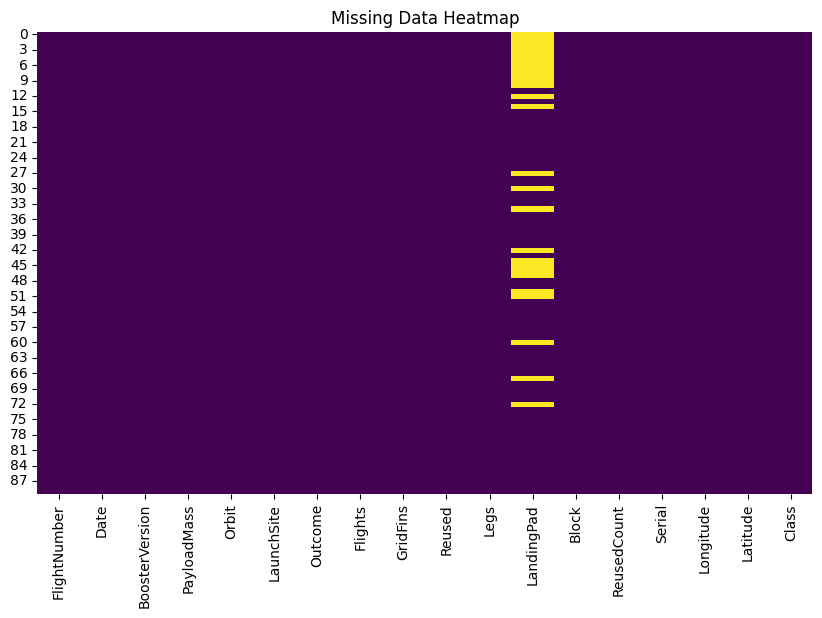

In [69]:
# Visualize missing data as heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [70]:
# Check unique values for categorical features
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: Date
Date
2010-06-04    1
2012-05-22    1
2013-03-01    1
2013-09-29    1
2013-12-03    1
             ..
2020-09-03    1
2020-10-06    1
2020-10-18    1
2020-10-24    1
2020-11-05    1
Name: count, Length: 90, dtype: int64

Column: BoosterVersion
BoosterVersion
Falcon 9    90
Name: count, dtype: int64

Column: Orbit
Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
HEO       1
ES-L1     1
SO        1
GEO       1
Name: count, dtype: int64

Column: LaunchSite
LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

Column: Outcome
Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

Column: LandingPad
LandingPad
5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: count, 

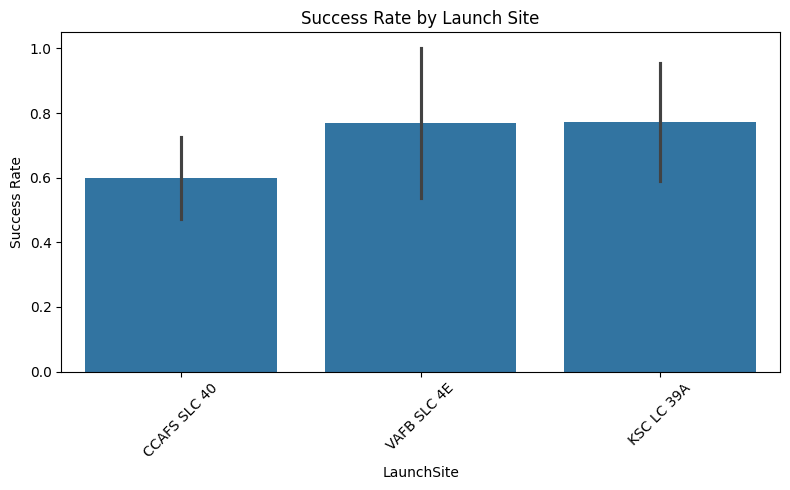

In [71]:
# Success Rate by Launch Site
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='LaunchSite', y='Class', estimator='mean')
plt.title("Success Rate by Launch Site")
plt.ylabel("Success Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

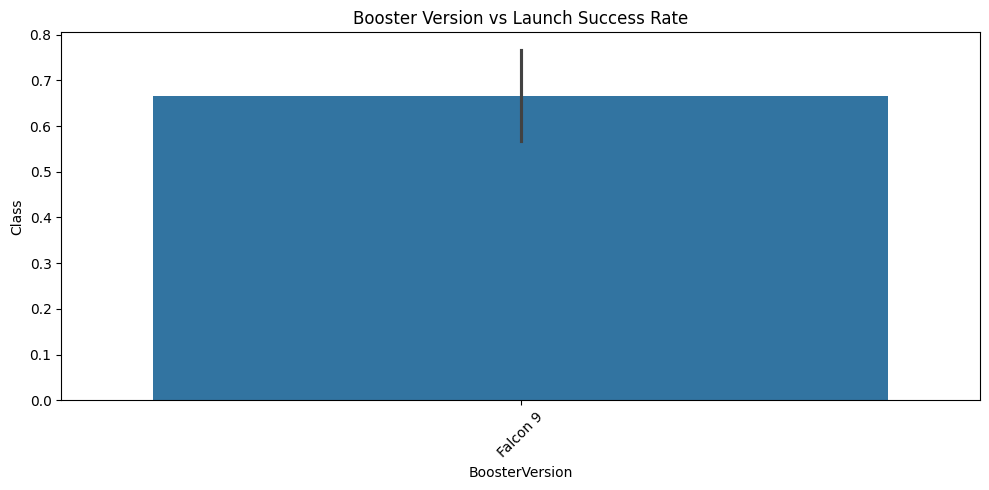

In [72]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='BoosterVersion', y='Class', estimator='mean')
plt.title("Booster Version vs Launch Success Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [73]:
import folium
from folium.plugins import MarkerCluster

m = folium.Map(location=[28, -80], zoom_start=5)
marker_cluster = MarkerCluster().add_to(m)

for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['LaunchSite']} | Success: {row['Class']}"
    ).add_to(marker_cluster)

m

**Preprocessing**

In [74]:
df.select_dtypes(include='object').columns


Index(['Date', 'BoosterVersion', 'Orbit', 'LaunchSite', 'Outcome',
       'LandingPad', 'Serial'],
      dtype='object')

In [75]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns.drop('Class')
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


In [77]:
df.isnull().sum()


,0
FlightNumber,0
Date,0
BoosterVersion,0
PayloadMass,0
Orbit,0
LaunchSite,0
Outcome,0
Flights,0
GridFins,0
Reused,0


In [78]:
df.fillna(method='ffill', inplace=True)


<ipython-input-78-4002983762>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


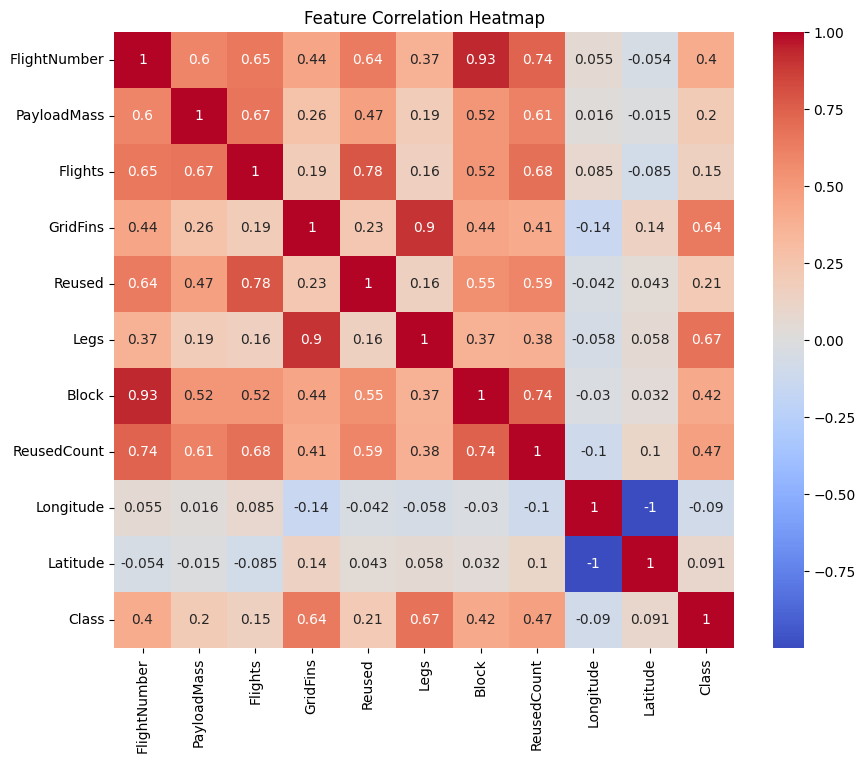

In [79]:
# Correlation matrix for numeric columns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

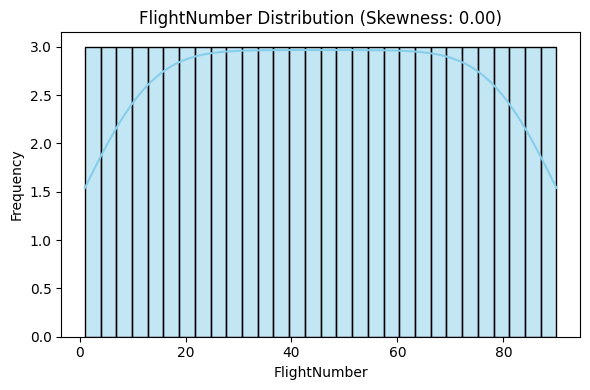

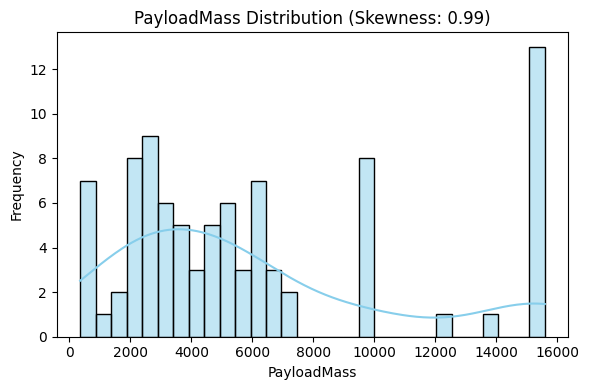

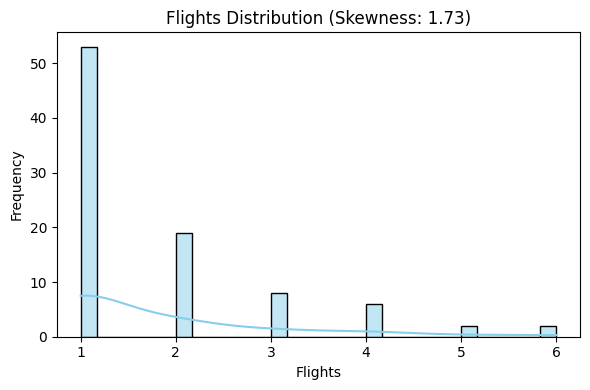

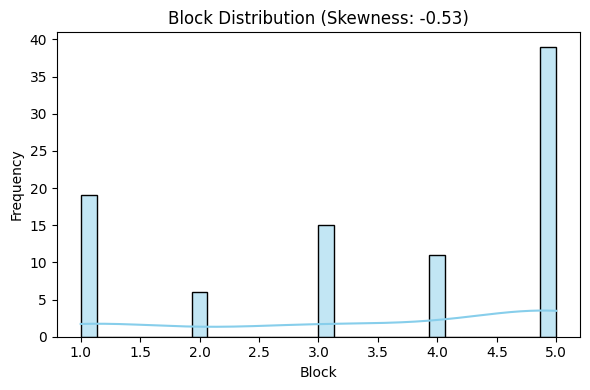

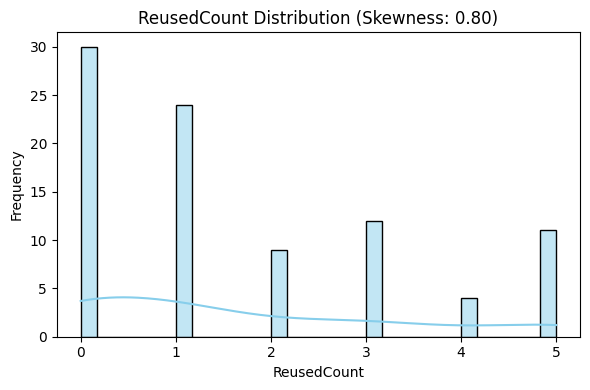

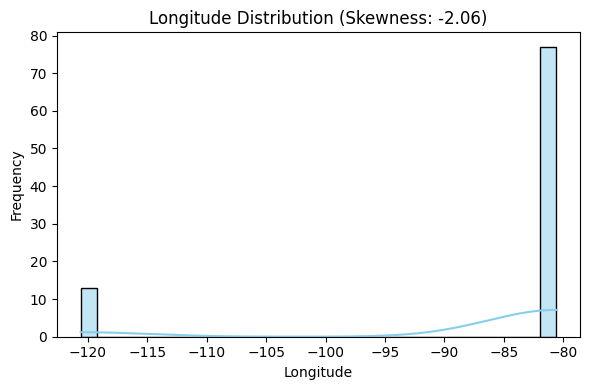

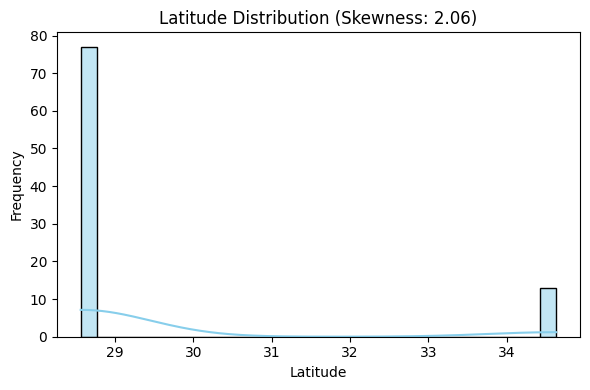

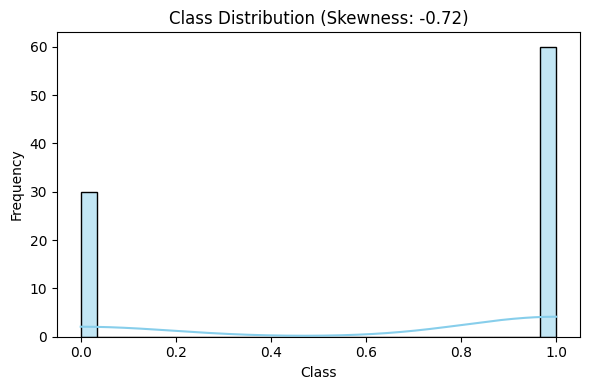

In [80]:
# Plot histograms and check skewness
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    skew_val = df[col].skew()
    plt.title(f"{col} Distribution (Skewness: {skew_val:.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


In [81]:
# Outlier summary using IQR method
outlier_summary = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    outlier_summary[col] = len(outliers)

print("Outlier counts per numeric feature:")
print(outlier_summary)


Outlier counts per numeric feature:
{'FlightNumber': 0, 'PayloadMass': 0, 'Flights': 10, 'Block': 0, 'ReusedCount': 0, 'Longitude': 13, 'Latitude': 13, 'Class': 0}


In [82]:
# Outlier summary using IQR method
outlier_summary = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    outlier_summary[col] = len(outliers)

print("Outlier counts per numeric feature:")
print(outlier_summary)


Outlier counts per numeric feature:
{'FlightNumber': 0, 'PayloadMass': 0, 'Flights': 10, 'Block': 0, 'ReusedCount': 0, 'Longitude': 13, 'Latitude': 13, 'Class': 0}


Visualize the relationship between Flight Number and Payload Mass

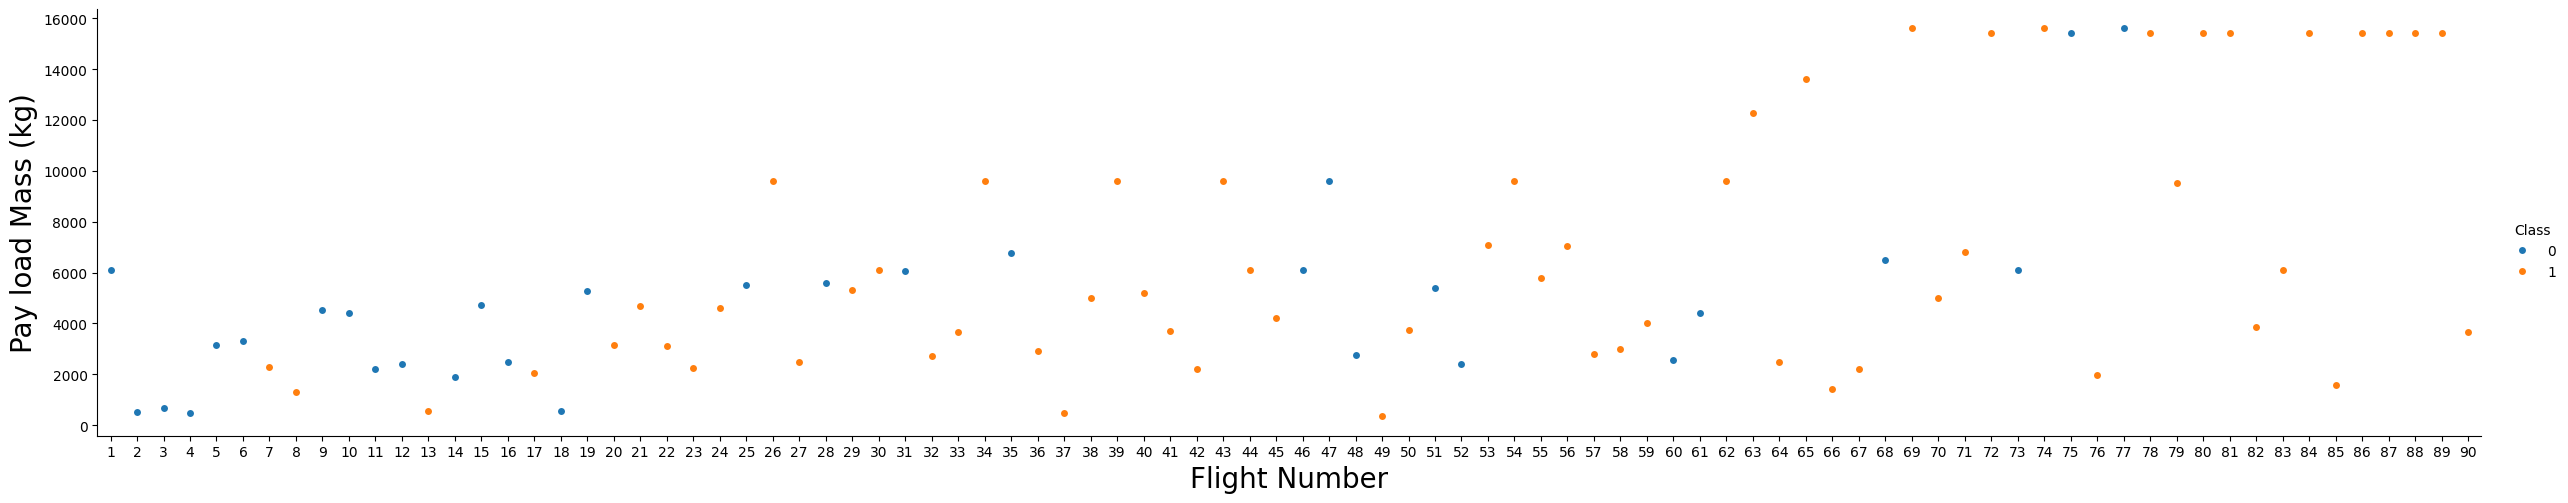

In [83]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Visualize the relationship between Flight Number and Launch Site


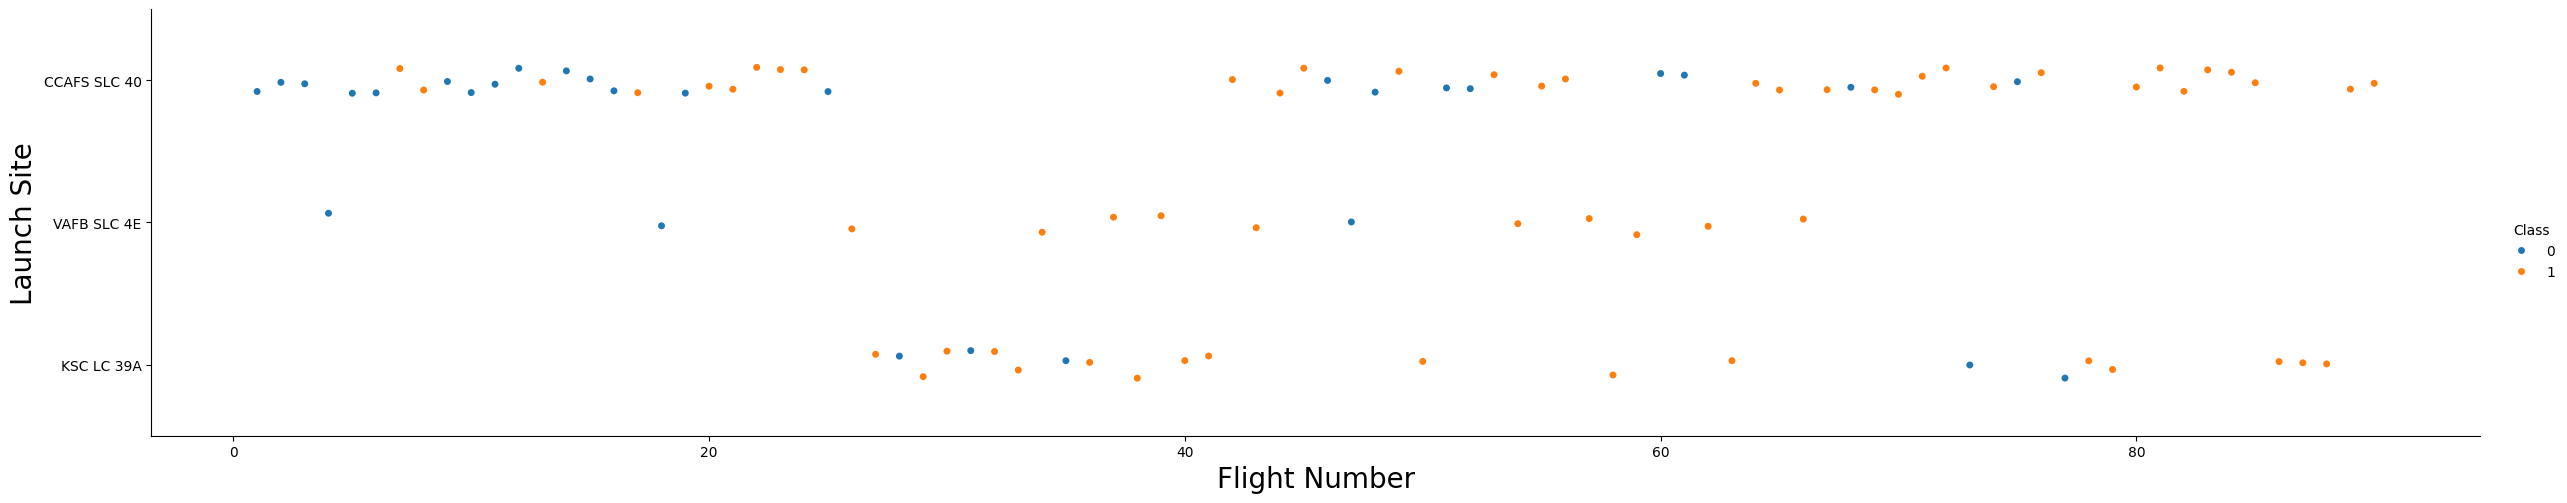

In [84]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Visualize the relationship between Payload and Launch Site


Text(31.078941666666665, 0.5, 'Pay load Mass (kg)')

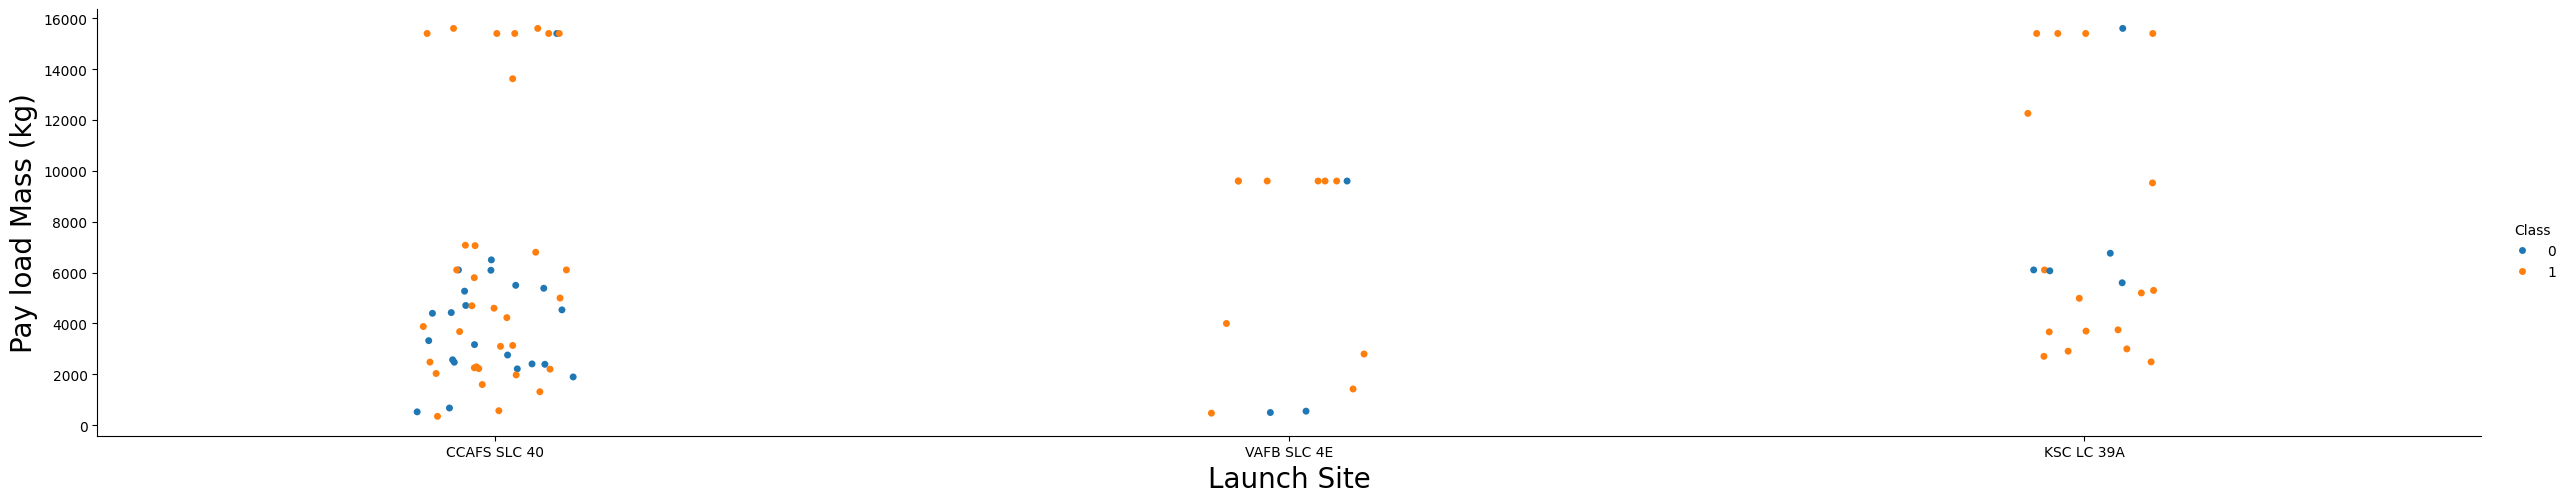

In [85]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)


# **Machine Learning**





In [86]:
df_encoded.dtypes[df_encoded.dtypes == 'object']


,0


In [87]:
df.drop('Date', axis=1, inplace=True)

In [88]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Class', axis=1)
y = df_encoded['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Logestic ligression**

In [89]:
! pip install scikit-Learn


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [97]:
X = df.drop(columns=['Class'], axis=1)
Y = df['Class']

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical columns
categorical_features = ['BoosterVersion', 'Orbit', 'LaunchSite', 'Outcome', 'LandingPad', 'Serial']

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=101)

# Apply one-hot encoding to training and testing sets
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# The encoded arrays can be used directly for training, no need to convert back to DataFrames here.
# Display shapes to confirm
print("Shape of X_train_encoded:", X_train_encoded.shape)
print("Shape of X_test_encoded:", X_test_encoded.shape)

Shape of X_train_encoded: (72, 86)
Shape of X_test_encoded: (18, 86)


**Train the model**

In [93]:
print(df.columns.tolist())


['FlightNumber', 'BoosterVersion', 'PayloadMass', 'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude', 'Class']


In [94]:
df = df.loc[:, ~df.columns.str.startswith('Date_')]


In [102]:
# Reload original DataFrame if needed

# Drop or convert Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

# One-hot encode
df_encoded = pd.get_dummies(df, drop_first=True)

# Split
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: 'Date'

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    print(f"\n{name}:\n")
    print(classification_report(y_test, y_pred))


Logistic Regression:

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.91      0.83      0.87        12

    accuracy                           0.83        18
   macro avg       0.81      0.83      0.82        18
weighted avg       0.84      0.83      0.84        18


Random Forest:

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.92      0.92      0.92        12

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18


SVM:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.67      1.00      0.80        12

    accuracy                           0.67        18
   macro avg       0.33      0.50      0.40        18
weighted avg       0.44    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr = LogisticRegression()
lr.fit(X_train_encoded, y_train)
y_pred = lr.predict(X_test_encoded)

print("Logistic Regression:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.91      0.83      0.87        12

    accuracy                           0.83        18
   macro avg       0.81      0.83      0.82        18
weighted avg       0.84      0.83      0.84        18

ROC AUC: 0.8333333333333334


In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_encoded, y_train)
y_pred_rf = rf.predict(X_test_encoded)

print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.85      0.92      0.88        12

    accuracy                           0.83        18
   macro avg       0.82      0.79      0.80        18
weighted avg       0.83      0.83      0.83        18

ROC AUC: 0.7916666666666667


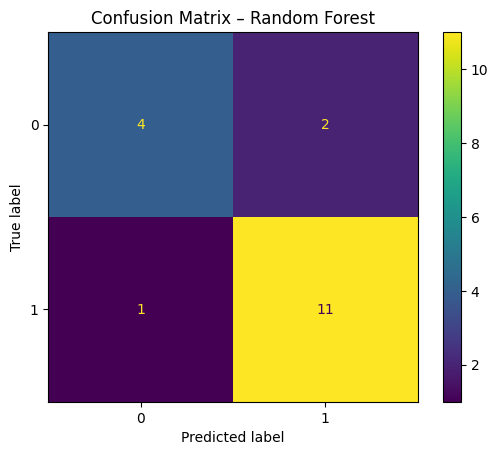

In [111]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(rf, X_test_encoded, y_test)
plt.title("Confusion Matrix – Random Forest")
plt.show()

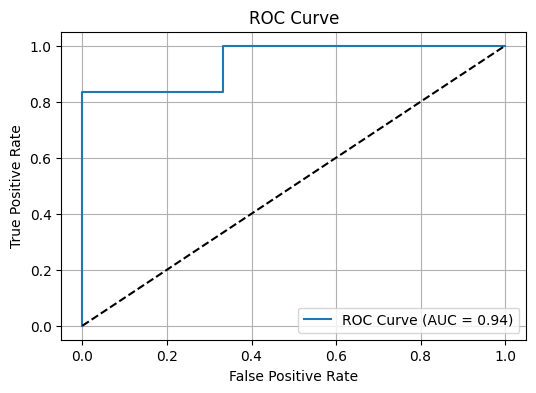

In [113]:
from sklearn.metrics import roc_curve, auc

y_probs = rf.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

Grid Search!


In [ ]:
knn_1 = KNeighborsClassifier()


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [ ]:
knn_cv = GridSearchCV(knn_1, parameters)
knn_cv.fit(X_train, y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)


In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=9)


In [ ]:
knn_1.fit(X_train,y_train)


In [ ]:
predictions_1 = knn_1.predict(X_test)


In [ ]:
confusion_matrix(y_test,predictions_1)


In [ ]:
accuracy_score(y_test,predictions_1, normalize=False)


In [ ]:
accuracy_score(y_test,predictions_1, normalize=True)


## New Section

# Decision Trees and Random Forest


In [ ]:
df = pd.read_csv('preprocessed_dataset.csv')


In [ ]:
df.head()


In [ ]:
df.info()


Define X , y

In [ ]:
X=df.drop('Class',axis=1)
y=df['Class']

Building a Decision tree Model


Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.3,
                                                    random_state=101)

Training and Predicting


In [ ]:
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()


In [ ]:
tree.fit(X_train,y_train)


In [ ]:
predictions = tree.predict(X_test)


In [ ]:
predictions


In [ ]:
y_test


Evaluation


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
confusion_matrix(y_test,predictions)


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(y_test,predictions, normalize=False)


In [ ]:
accuracy_score(y_test,predictions, normalize=True)


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test,predictions))


Grid Search for Decision Tree!


In [ ]:
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV

In [ ]:
tree_1 = DecisionTreeClassifier()


In [ ]:
parameters = {'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5]}

In [ ]:
tree_cv = GridSearchCV(tree_1, parameters)
tree_cv.fit(X_train, y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)


In [ ]:
tree_1 = DecisionTreeClassifier(min_samples_leaf= 1, min_samples_split= 5)


In [ ]:
tree_1.fit(X_train,y_train)


In [ ]:
predictions_1 = tree_1.predict(X_test)


In [ ]:
confusion_matrix(y_test,predictions_1)


In [ ]:
accuracy_score(y_test,predictions_1, normalize=False)


In [ ]:
accuracy_score(y_test,predictions_1, normalize=True)


Building a Random Forest Model


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)


In [ ]:
print(confusion_matrix(y_test,rfc_pred))


In [ ]:
accuracy_score(y_test,predictions, normalize=False)


In [ ]:
accuracy_score(y_test,predictions, normalize=True)


In [ ]:
print(classification_report(y_test,rfc_pred))


In [ ]:
# Grid Search for Random Forest!


In [ ]:
rfc_1 = RandomForestClassifier()


In [ ]:
parameters = {'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],  'n_estimators': [10,20,30] }

In [ ]:
rfc_cv = GridSearchCV(rfc_1, parameters)
rfc_cv.fit(X_train, y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)


In [ ]:
print("tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)


In [ ]:
rfc_1 = RandomForestClassifier( n_estimators= 10, min_samples_leaf= 1, min_samples_split= 2)


In [ ]:
rfc_1.fit(X_train,y_train)


In [ ]:
predictions_1 = rfc_1.predict(X_test)


In [ ]:
confusion_matrix(y_test,predictions_1)


In [ ]:
accuracy_score(y_test,predictions_1, normalize=False)


In [ ]:
accuracy_score(y_test,predictions_1, normalize=True)


In [ ]:
X = df.drop(columns=['Class'], axis=1)
Y = df['Class']

# Select categorical columns for one-hot encoding
categorical_cols = ['BoosterVersion', 'Orbit', 'LaunchSite', 'Outcome', 'LandingPad', 'Serial']

# Apply one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

display(X_encoded.head())